In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-07-12 07:47:13--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.182.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2023-07-12 07:47:13 (162 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

with open("/content/sarcasm.json",'r') as f:
  datastore = json.load(f)

In [ ]:
datastore

In [3]:
senstences=[]
labels=[]

In [4]:
for item in datastore:
  senstences.append(item['headline'])
  labels.append(item['is_sarcastic'])


In [13]:
print(len(senstences))

26709


In [14]:
training_size = 20000

vocab_size = 10000
max_length = 32
embedding_dim = 16


In [15]:
training_sentences = senstences[0:training_size]
testing_sentences = senstences[training_size:]

training_labels = labels[0:training_size]
testing_lables = labels[training_size:]

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

padding_type='post'
trunc_type = 'post'
oov_tok = '<OOV>'

In [17]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

In [18]:
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
word_index

In [22]:
training_seqs = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_seqs, maxlen = max_length, padding = padding_type, truncating=trunc_type)

In [23]:
testing_seqs = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_seqs, maxlen = max_length, padding = padding_type, truncating=trunc_type)

In [24]:
training_padded[7]

array([  20,  563,   36, 1091,   31,  163,    2,  103,   87,   18,  150,
          6,   33,  343,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [25]:
training_sentences[7]

'this ceo will send your kids to school, if you work for his company'

In [26]:
testing_padded[5]

array([  44, 3450, 1906,  627,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [28]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_lables)

In [29]:
import tensorflow as tf


In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss= 'binary_crossentropy', optimizer ='adam', metrics=['acc'])

In [33]:
history = model.fit(training_padded, training_labels, epochs = 30, validation_data=(testing_padded, testing_labels), verbose =2)

Epoch 1/30
625/625 - 27s - loss: 0.5610 - acc: 0.7035 - val_loss: 0.3948 - val_acc: 0.8380 - 27s/epoch - 43ms/step
Epoch 2/30
625/625 - 3s - loss: 0.3089 - acc: 0.8747 - val_loss: 0.3441 - val_acc: 0.8542 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 4s - loss: 0.2302 - acc: 0.9090 - val_loss: 0.3477 - val_acc: 0.8532 - 4s/epoch - 6ms/step
Epoch 4/30
625/625 - 4s - loss: 0.1849 - acc: 0.9298 - val_loss: 0.3686 - val_acc: 0.8518 - 4s/epoch - 7ms/step
Epoch 5/30
625/625 - 3s - loss: 0.1540 - acc: 0.9434 - val_loss: 0.3950 - val_acc: 0.8514 - 3s/epoch - 4ms/step
Epoch 6/30
625/625 - 4s - loss: 0.1290 - acc: 0.9552 - val_loss: 0.4306 - val_acc: 0.8472 - 4s/epoch - 7ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1112 - acc: 0.9616 - val_loss: 0.4734 - val_acc: 0.8422 - 3s/epoch - 5ms/step
Epoch 8/30
625/625 - 4s - loss: 0.0950 - acc: 0.9676 - val_loss: 0.5213 - val_acc: 0.8362 - 4s/epoch - 6ms/step
Epoch 9/30
625/625 - 3s - loss: 0.0827 - acc: 0.9729 - val_loss: 0.5743 - val_acc: 0.8334 - 3s/epoch 

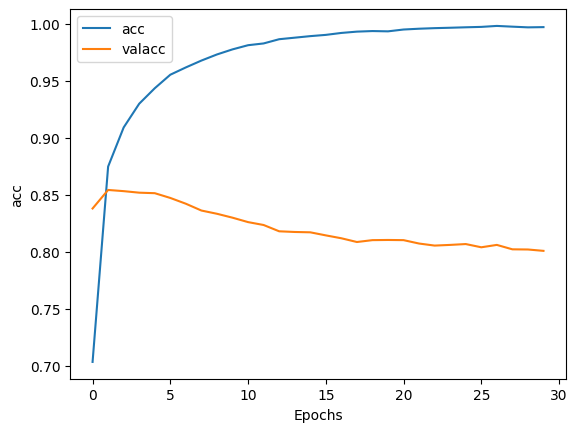

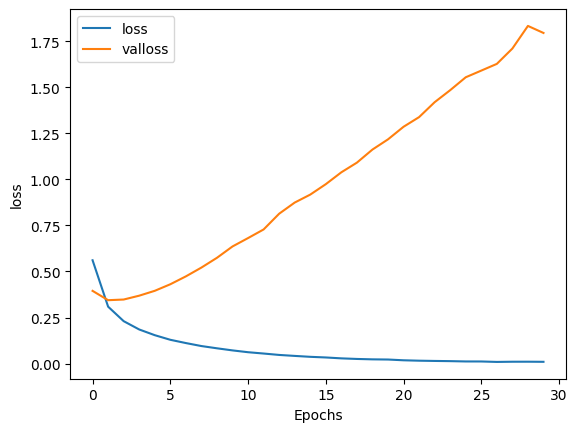

In [35]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')


In [37]:
test_sen = ['tom starting to fear spiders in the garden might be real', 'the weather today is bright and sunny']
test_seq = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_seq, maxlen=max_length, padding = padding_type, truncating=trunc_type)

model.predict(test_padded)

1/1 [==============================] - 0s 19ms/step


array([[9.996786e-01],
       [6.635327e-08]], dtype=float32)